In [17]:
%matplotlib notebook

import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glasbey

import time
import pickle
import memory_profiler

%load_ext memory_profiler

from pathlib import Path
import distro

%load_ext watermark

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [2]:
# import black
import jupyter_black

jupyter_black.load(line_length=79)

In [3]:
variables_path = Path("../results/variables/iclr25v1")
figures_path = Path("../results/figures")
data_path = Path("../data")

In [4]:
pwd

'/gpfs01/berens/user/rgonzalesmarquez'

In [5]:
# MANUAL FIX TO PATH ISSUE FROM VSCODE
nb_path = Path("phd/iclr-dataset/scripts")
assert nb_path.exists(), "The path does not exist"

variables_path = (nb_path / variables_path).resolve(strict=True)
figures_path = (nb_path / figures_path).resolve(strict=True)
data_path = (nb_path / data_path).resolve(strict=True)

In [6]:
print(variables_path)

/gpfs01/berens/user/rgonzalesmarquez/phd/iclr-dataset/results/variables/iclr25v1


In [7]:
plt.style.use((nb_path / Path("matplotlib_style.txt")).resolve(strict=True))

In [8]:
%watermark -a 'Rita González-Márquez' -t -d -tz -u -v -iv -w -m -h -p transformers,openTSNE

Author: Rita González-Márquez

Last updated: 2024-10-28 14:18:04CET

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.28.0

transformers: 4.45.2
openTSNE    : 1.0.2

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 4.18.0-553.el8_10.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

Hostname: rgonzalesmarquez_GPU0-llm_gber7

seaborn        : 0.13.2
matplotlib     : 3.9.2
memory_profiler: 0.61.0
distro         : 1.9.0
glasbey        : 0.2.1
jupyter_black  : 0.4.0
numpy          : 1.26.4
pandas         : 2.2.3

Watermark: 2.5.0



ICLR new data

# Import

In [9]:
%%time
iclr = pd.read_parquet(
    data_path / "iclr25v1.parquet",
    engine="pyarrow",
)

CPU times: user 384 ms, sys: 108 ms, total: 492 ms
Wall time: 498 ms


In [10]:
iclr.keywords = iclr.keywords.transform(lambda x: list(x))
iclr.scores = iclr.scores.transform(lambda x: list(x))

In [11]:
iclr.head()

,year,id,title,abstract,authors,decision,scores,keywords,labels
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]",transfer learning
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]",language models
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning],unlabeled
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[],unlabeled
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing],language models


# Create new labels
Labels are the same as for the 2024 dataset, except for:

- 6 new classes have been added (`safety`, `alignment`, `autonomous driving`, `code generation`, `knowledge graphs`, and `neuroscience`).

- class `contrastive learning` and `self-supervised learning` have been merged.

- keyword `semantic segmentation` has been added to the class `object detection`.

- keyword `multi-agent` has been added to the class `multi-agent RL`.

- keywords `bert` and `text generation` have been added to the class `LLMs`.

- For all keywords where it makes sense, plural has been aded (e.g. `adversarial attack` and `adversarial attacks`).


## Lists of keywords and corresponding labels

In [12]:
dict_keyword_to_label_25 = {
    ###### ADVERSARIAL
    "adversarial": "adversarial",
    "adversarial attack": "adversarial",
    "adversarial attacks": "adversarial",
    "adversarial defense": "adversarial",
    "adversarial examples": "adversarial",
    "adversarial example": "adversarial",  # NEW 2025
    "adversarial learning": "adversarial",
    "adversarial machine learning": "adversarial",
    "adversarial robustness": "adversarial",
    "adversarial training": "adversarial",
    ###### TRANSFORMERS
    "attention": "transformers",
    "attention mechanism": "transformers",
    "transformer": "transformers",
    "transformers": "transformers",
    "self-attention": "transformers",
    ###### AUTOENCODERS
    "autoencoder": "autoencoders",
    "autoencoders": "autoencoders",
    "vae": "autoencoders",
    "vaes": "autoencoders",  # NEW 2025
    "variational autoencoder": "autoencoders",
    "variational autoencoders": "autoencoders",
    ######
    "anomaly detection": "anomaly detection",
    ###### CAUSALITY
    "causal discovery": "causality",
    "causal inference": "causality",
    "causality": "causality",
    ######
    "clustering": "clustering",
    ###### COMPRESSION
    "compression": "compression",
    "model compression": "compression",
    ######
    "object detection": "object detection",
    "semantic segmentation": "object detection",  # NEW 2025
    # ######  -- MOVED TO SSL IN 2025
    # "contrastive learning": "contrastive learning",
    ###### CNNs
    "convolutional neural network": "CNNs",
    "convolutional neural networks": "CNNs",
    "cnn": "CNNs",
    "cnns": "CNNs",  # NEW 2025
    ###### DIFFUSION MODELS
    "diffusion": "diffusion models",
    "diffusion model": "diffusion models",
    "diffusion models": "diffusion models",
    ###### EXPLAINABILITY
    "explainability": "explainability",
    "explainable ai": "explainability",
    ######
    "interpretability": "interpretability",
    ######
    "fairness": "fairness",
    ######
    "federated learning": "federated learning",
    ###### GANs
    "generative adversarial network": "GANs",
    "generative adversarial networks": "GANs",
    "gan": "GANs",
    "gans": "GANs",
    ###### GRAPHS
    "graph": "graphs",
    "graphs": "graphs",  # NEW 2025
    "graph neural network": "graphs",
    "graph neural networks": "graphs",
    "graph representation learning": "graphs",
    "gnn": "graphs",  # NEW 2025
    "gnns": "graphs",
    "node classification": "graphs",
    ###### LLMs
    "llm": "LLMs",
    "large language model": "LLMs",
    "large language models": "LLMs",
    "prompting": "LLMs",
    "bert": "LLMs",  # NEW 2025
    "llms": "LLMs",  # NEW 2025
    "text generation": "LLMs",  # NEW 2025
    ######
    "knowledge distillation": "knowledge distillation",
    ###### LANGUAGE MODELS
    "natural language processing": "language models",
    "nlp": "language models",
    "language model": "language models",
    "language models": "language models",
    "language modeling": "language models",
    "machine translation": "language models",
    "question answering": "language models",
    "reasoning": "language models",
    ###### META LEARNING
    "meta learning": "meta learning",
    "meta-learning": "meta learning",
    ###### PRUNING
    "network pruning": "pruning",
    "pruning": "pruning",
    ######
    "neural architecture search": "neural architecture search",
    ######
    "optimal transport": "optimal transport",
    ###### OPTIMIZATION
    "stochastic gradient descent": "optimization",
    "stochastic optimization": "optimization",
    "sgd": "optimization",
    "optimization": "optimization",
    "non-convex optimization": "optimization",
    "convex optimization": "optimization",
    "gradient descent": "optimization",
    "combinatorial optimization": "optimization",
    "bayesian optimization": "optimization",
    ###### OUT-OF-DISTRIBUTION
    "out-of-distribution": "out-of-distribution",
    "out-of-distribution detection": "out-of-distribution",
    "out-of-distribution generalization": "out-of-distribution",
    "distribution shift": "out-of-distribution",
    ###### PRIVACY
    "differential privacy": "privacy",
    "privacy": "privacy",
    ###### RNNs
    "rnn": "RNNs",
    "rnns": "RNNs",  # NEW 2025
    "recurrent neural network": "RNNs",
    "recurrent neural networks": "RNNs",
    "lstm": "RNNs",
    ###### REINFORCEMENT LEARNING
    "reinforcement learning": "RL",
    "deep reinforcement learning": "RL",
    ######
    "active learning": "active learning",
    ######
    "model-based reinforcement learning": "model-based RL",
    ######
    "multi-agent reinforcement learning": "multi-agent RL",
    "multi-agent": "multi-agent RL",  # NEW 2025
    ######
    "multi-task learning": "multi-task learning",
    ######
    "imitation learning": "imitation learning",
    ###### OFFLINE RL
    "offline reinforcement learning": "offline RL",
    "offline rl": "offline RL",
    ###### CONTINUAL LEARNING
    "continual learning": "continual learning",
    "lifelong learning": "continual learning",
    ######
    "in-context learning": "in-context learning",
    ######
    "few-shot learning": "few-shot learning",
    ######
    "robustness": "robustness",
    ###### SELF-SUPERVISED LEARNING
    "self-supervised learning": "self-supervised learning",
    "contrastive learning": "self-supervised learning",
    ######
    "semi-supervised learning": "semi-supervised learning",
    ###### TIME SERIES
    "time series": "time series",
    "time series forecasting": "time series",
    ###### TRANSFER LEARNING
    "transfer learning": "transfer learning",
    "domain adaptation": "transfer learning",
    "domain generalization": "transfer learning",
    ###### ViTs
    "vision transformer": "ViTs",
    "vision transformers": "ViTs",
    ###### VISION-LANGUAGE MODELS
    "vision-language models": "vision-language models",
    "vision-language model": "vision-language models",  # NEW 2025
    "clip": "vision-language models",
    ###### ---------------------------- NEW 2025 --------------------------------
    #### SAFETY
    "ai safety": "safety",
    "safety": "safety",
    #### ALIGNMENT
    "alignment": "alignment",
    "rlhf": "alignment",
    #####
    "autonomous driving": "autonomous driving",
    #### CODE GENERATION
    "code generation": "code generation",
    "program synthesis": "code generation",
    #### KNOWLEDGE GRAPHS
    "knowledge graph": "knowledge graphs",
    "knowledge graphs": "knowledge graphs",
    # ####
    "neuroscience": "neuroscience",
}

In [13]:
print("# keywords: ", len(np.unique(list(dict_keyword_to_label_25.keys()))))
print("# labels: ", len(np.unique(list(dict_keyword_to_label_25.values()))))

# keywords:  134
# labels:  50


In [14]:
# 2025
unique_keywords_25, counts_25 = np.unique(
    np.hstack(iclr.keywords), return_counts=True
)

n = 200
unique_keywords_25_sorted = unique_keywords_25[np.flip(np.argsort(counts_25))]
counts_25_sorted = np.flip(np.sort(counts_25))

In [15]:
dict_keywords_frequencies_25 = dict(
    zip(unique_keywords_25_sorted, counts_25_sorted)
)

In [18]:
freqs_keywords_25 = [
    dict_keywords_frequencies_25[key]
    for key in dict_keyword_to_label_25.keys()
]

list_to_group = list(
    zip(
        dict_keyword_to_label_25.values(),
        dict_keyword_to_label_25.keys(),
        freqs_keywords_25,
    )
)
key_func = lambda x: x[0]

final_keywords_groups_25 = []
for key, group in itertools.groupby(list_to_group, key_func):
    final_keywords_groups_25.append([elem[1:] for elem in group])

final_keywords_groups_25

[[('adversarial', 67),
  ('adversarial attack', 151),
  ('adversarial attacks', 145),
  ('adversarial defense', 63),
  ('adversarial examples', 210),
  ('adversarial example', 34),
  ('adversarial learning', 98),
  ('adversarial machine learning', 64),
  ('adversarial robustness', 296),
  ('adversarial training', 250)],
 [('attention', 241),
  ('attention mechanism', 73),
  ('transformer', 495),
  ('transformers', 403),
  ('self-attention', 97)],
 [('autoencoder', 73),
  ('autoencoders', 61),
  ('vae', 81),
  ('vaes', 10),
  ('variational autoencoder', 106),
  ('variational autoencoders', 89)],
 [('anomaly detection', 151)],
 [('causal discovery', 86), ('causal inference', 151), ('causality', 117)],
 [('clustering', 157)],
 [('compression', 156), ('model compression', 173)],
 [('object detection', 151), ('semantic segmentation', 111)],
 [('convolutional neural network', 81),
  ('convolutional neural networks', 138),
  ('cnn', 106),
  ('cnns', 24)],
 [('diffusion', 151), ('diffusion mod

## Extend color palette

In [19]:
pickle_in = open(
    "/gpfs01/berens/user/rgonzalesmarquez/phd/iclr-dataset/results/variables/iclr24v2/dict_label_to_color.pkl",
    "rb",
)
dict_label_to_color = pickle.load(pickle_in)

In [20]:
# merge self-supervised learning and contrastive learning and drop CL color
dict_label_to_color["self-supervised learning"] = dict_label_to_color[
    "contrastive learning"
]
dict_label_to_color.pop("contrastive learning", None)

'#4528a6'

In [30]:
len(np.unique(list(dict_keyword_to_label_25.values()))) + 1 - len(old_palette)

6

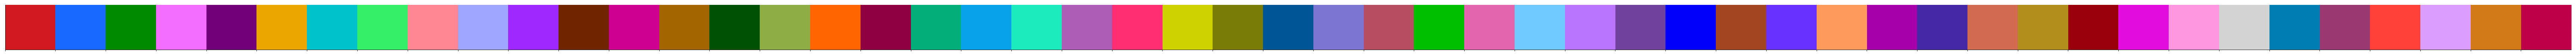

In [22]:
%matplotlib inline

old_palette = list(dict_label_to_color.values())

palette = glasbey.extend_palette(
    old_palette,
    palette_size=len(np.unique(list(dict_keyword_to_label_25.values())))
    + 1,  # +1 : unlabeled and +1 to skip that very similar green
    lightness_bounds=(20, 75),
    chroma_bounds=(50, 90),
    hue_bounds=(220, 90),
)
sns.palplot(palette)

In [31]:
len(palette)

51

In [42]:
dict_label_to_color_25 = dict_label_to_color.copy()

for i, elem in enumerate(
    set(dict_keyword_to_label_25.values()).difference(
        set(dict_label_to_color.keys())
    )
):
    print(elem)
    dict_label_to_color_25[elem] = palette[45 + i]

knowledge graphs
code generation
autonomous driving
safety
alignment
neuroscience


In [ ]:
dict_label_to_color_25["alignment"]
# len(dict_label_to_color_25)

'#007db2'

In [ ]:
print(dict_label_to_color_25["knowledge graphs"])
print(dict_label_to_color_25["safety"])

#d27918
#db9eff


In [241]:
# manual change of two colors
color1 = dict_label_to_color_25["knowledge graphs"]
dict_label_to_color_25["knowledge graphs"] = dict_label_to_color_25["safety"]
dict_label_to_color_25["safety"] = color1

In [242]:
print(dict_label_to_color_25["knowledge graphs"])
print(dict_label_to_color_25["safety"])

#db9eff
#d27918


## Assignment

In [243]:
import itertools


def assign_labels_and_colors(
    data, keywords_and_freqs, dict_keyword_to_label, dict_color_legend=None
):
    """Assign labels and colors from list with lists of keywords.

    Parameters
    ----------
    data: list of lists, len (n_samples)
        List with lists of keywords for every paper.
    keywords_and_freqs: list of lists, len (n_labels)
        List of keywords groups. Contains all keywords and frequencies, with sublists of subgroups of keywords.
    dict_keyword_to_label: dict
        Dictionary assigning to each keyword its label (e.g. to all keywords in same subgroup same label).
    dict_color_legend: dict, len (n_labels)
        Dictionary assigning to each label a color.

    Returns
    -------
    labels: array, shape (n_samples,)
        Label for each paper.
    colors: array, shape (n_samples,)
        Color for each paper.


    """

    # prepare dict_freqs
    dict_freqs = dict(list(itertools.chain.from_iterable(keywords_and_freqs)))
    dict_freqs["unlabeled"] = (
        1e9  # assign very large value to unlabeled for argmax
    )

    # clean empty lists of keywords from the data
    data_without_empty = [
        ["unlabeled"] if elem == [] else elem for elem in data
    ]

    # choose keywords for each paper
    chosen_keywords = []
    for list_keywords in data_without_empty:
        list_keywords_filtered = [
            elem if elem in set(dict_freqs.keys()) else "unlabeled"
            for elem in list_keywords
        ]

        freqs = np.vectorize(dict_freqs.get)(list_keywords_filtered)

        chosen_keyword = list_keywords_filtered[np.argmin(freqs)]
        chosen_keywords.append(chosen_keyword)

    chosen_keywords = np.array(chosen_keywords)

    # map chosen keywords to labels
    dict_keyword_to_label["unlabeled"] = "unlabeled"
    labels = np.vectorize(dict_keyword_to_label.get)(chosen_keywords)

    # colors
    colors = np.vectorize(dict_color_legend.get)(labels)

    return labels, colors

In [244]:
%%time
labels_iclr, colors_iclr = assign_labels_and_colors(
    iclr.keywords.to_list(),
    final_keywords_groups_25,
    dict_keyword_to_label_25,
    dict_label_to_color_25,
)

CPU times: user 830 ms, sys: 176 ms, total: 1.01 s
Wall time: 836 ms


In [245]:
# save
np.save(variables_path / "labels_iclr", labels_iclr)
np.save(variables_path / "colors_iclr", colors_iclr)

f = open(variables_path / "dict_label_to_color.pkl", "wb")
pickle.dump(dict_label_to_color_25, f)
f.close()

In [249]:
print(
    "Percentage of unlabeled papers: ",
    np.sum(labels_iclr == "unlabeled") / len(labels_iclr) * 100,
)
print(
    "Number of unlabeled papers: ",
    np.sum(labels_iclr == "unlabeled"),
)

Percentage of unlabeled papers:  45.313405167419766
Number of unlabeled papers:  15644


In [250]:
print(
    "Papers without any keywords: ",
    np.sum([1 if elem == [] else 0 for elem in iclr.keywords])
    / len(labels_iclr)
    * 100,
)

Papers without any keywords:  6.172517668868034


## Add column to dataframe and resave

In [251]:
iclr.head()

,year,id,title,abstract,authors,decision,scores,keywords,labels
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]",transfer learning
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]",language models
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning],unlabeled
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[],unlabeled
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing],language models


In [252]:
iclr["labels"] = labels_iclr

In [253]:
iclr.head()

,year,id,title,abstract,authors,decision,scores,keywords,labels
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]",transfer learning
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]",language models
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning],unlabeled
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[],unlabeled
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing],language models


In [254]:
# save
iclr.to_parquet(
    data_path / "iclr25v1.parquet",
    index=False,
    engine="pyarrow",
)